### Problem Statement :

Evanston Hospital is a comprehensive acute-care facility in Illinois, US. The hospital offers a wide range of services and surgical specialities, in addition to having high-end lab capabilities. Despite spending a considerable amount of resources on improving its services, the hospital’s CMS rating has remained at 3 for the past 5 years, and this has led to a steady decline in revenue for the hospital. For hospitals like Evanston, these ratings directly influence the choice made by consumers who are looking for a healthcare provider and would, therefore, have a significant impact on the hospitals’ revenues. As a consulting company hired by Evanston, our task is to identify possible root causes for the hospital getting such an average rating and recommend measures to mitigate this problem.

### Solution Approach:

The following approach has been carried out to arrive at the solution for the given problem:

1. Data Understanding
2. Data Cleaning
3. Data Visualization
4. Data Preparation
5. Modelling

### 1. Data Understanding

###### Import the packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, classification_report

###### Read the data from csv file

In [2]:
genInfo = pd.read_csv('Hospital General Information.csv', encoding='cp1252')
genInfo.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


###### Checking number of rows and columns in dataset

In [3]:
genInfo.shape

(4818, 28)

###### Detailed information of dataset

In [4]:
genInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

###### Statistical description of dataset

In [5]:
genInfo.describe(include='object')

,Hospital Name,Address,City,State,County Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
count,4818,4818,4818,4818,4803,4818,4818,4818,4383,4818,1342,4818,1337,4818,1892,4818,1002,4818,1355,4818,1116,4818,1331,4818,2026
unique,4617,4789,2949,56,1565,3,10,2,1,6,5,4,3,4,3,4,3,4,3,4,3,4,3,4,3
top,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,CHICAGO,TX,LOS ANGELES,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,There are too few measures or measure groups r...,Same as the National average,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...,Same as the National average,Results are not available for this reporting p...
freq,15,7,29,407,83,3382,2027,4524,4383,1772,957,2736,1125,1892,1680,2133,790,1355,1143,2196,904,1481,1119,2059,1814


- We could see that there are many columns which has got `Null` values. Also there are both types of columns `numeric` and `categoricals`.

### 2. Data Cleaning

###### Checking for percentage of Null values in each columns

In [6]:
round(100*genInfo.isna().sum()/len(genInfo), 2)

Provider ID                                                       0.00
Hospital Name                                                     0.00
Address                                                           0.00
City                                                              0.00
State                                                             0.00
ZIP Code                                                          0.00
County Name                                                       0.31
Phone Number                                                      0.00
Hospital Type                                                     0.00
Hospital Ownership                                                0.00
Emergency Services                                                0.00
Meets criteria for meaningful use of EHRs                         9.03
Hospital overall rating                                           0.00
Hospital overall rating footnote                                 72.15
Mortal

- As there few columns with more than `50%` null values, such columns are dropped. The columns that are dropped are: `Hospital overall rating footnote`, `Safety of care national comparison`, `Readmission national comparison`, `Patient experience national comparison`, `Effectiveness of care national comparison`, `Timeliness of care national comparison`, `Efficient use of medical imaging national comparison`.

###### Dropping the columns with more than 50% of null value

In [7]:
genInfo.drop(genInfo.columns[round(100*genInfo.isna().sum()/len(genInfo), 2) > 50], axis=1, inplace=True)

###### Checking the number of rows and columns left

In [8]:
genInfo.shape

(4818, 20)

###### Imputing the missing values with 'N' in column 'Meets criteria for meaningful use of EHRs'

In [9]:
genInfo['Meets criteria for meaningful use of EHRs'].fillna('N', inplace=True)

###### Checking for percentage of Null values in each column

In [10]:
round(100*genInfo.isna().sum()/len(genInfo), 2)

Provider ID                                             0.00
Hospital Name                                           0.00
Address                                                 0.00
City                                                    0.00
State                                                   0.00
ZIP Code                                                0.00
County Name                                             0.31
Phone Number                                            0.00
Hospital Type                                           0.00
Hospital Ownership                                      0.00
Emergency Services                                      0.00
Meets criteria for meaningful use of EHRs               0.00
Hospital overall rating                                 0.00
Mortality national comparison                           0.00
Safety of care national comparison                      0.00
Readmission national comparison                         0.00
Patient experience natio

###### Finding the value counts for each columns

In [11]:
for col in genInfo:
    if genInfo[col].dtype == 'O':
        print(round(genInfo[col].value_counts()/len(genInfo) * 100, 2))
        print('='*100, end='\n\n')

MEMORIAL HOSPITAL                   0.31
COMMUNITY MEMORIAL HOSPITAL         0.17
SHRINERS HOSPITALS FOR CHILDREN     0.15
ST JOSEPH HOSPITAL                  0.15
GOOD SAMARITAN HOSPITAL             0.15
                                    ... 
CLARION HOSPITAL                    0.02
SCOTT COUNTY HOSPITAL               0.02
CHRISTUS ST PATRICK HOSPITAL        0.02
AVERA DELLS AREA HOSPITAL  - CAH    0.02
MORRISON COMMUNITY HOSPITAL         0.02
Name: Hospital Name, Length: 4617, dtype: float64

100 HOSPITAL DRIVE            0.15
200 HOSPITAL DRIVE            0.08
100 MEDICAL CENTER DRIVE      0.08
ONE HOSPITAL DRIVE            0.06
500 HOSPITAL DRIVE            0.04
                              ... 
301 UNIVERSITY BOULEVARD      0.02
5501 NORTH PORTLAND AVENUE    0.02
3500 SOUTH 4TH STREET         0.02
483 WEST SEED FARM ROAD       0.02
412 MUSTANG AVENUE            0.02
Name: Address, Length: 4789, dtype: float64

CHICAGO         0.60
HOUSTON         0.54
LOS ANGELES     0.42
PHILA

###### Replacing the 'Not Available' value with '0' in the column 'Hospital overall rating'
Assuming that 'Not Available' as 0 in column Hospital overall rating for further analysis

In [12]:
genInfo['Hospital overall rating'].replace('Not Available', 0, inplace=True)

###### Converting the data type of 'Hospital overall rating' column to 'integer'

In [13]:
genInfo['Hospital overall rating'] = genInfo['Hospital overall rating'].astype('int64')

###### Imputing the values in 'Emergency Services', 'Meets criteria for meaningful use of EHRs' columns with 0s and 1s instead of 'No' and 'Yes' respectively

In [14]:
binvars = ['Emergency Services', 'Meets criteria for meaningful use of EHRs']

def bin_vars(x):
    return x.map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})

genInfo[binvars] = genInfo[binvars].apply(bin_vars)
genInfo.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,1,1,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,1,1,3,Same as the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Above the National average,Not Available
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,1,1,3,Same as the National average,Not Available,Same as the National average,Not Available,Same as the National average,Above the National average,Not Available


In [15]:
genInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           4818 non-null   int64 
 1   Hospital Name                                         4818 non-null   object
 2   Address                                               4818 non-null   object
 3   City                                                  4818 non-null   object
 4   State                                                 4818 non-null   object
 5   ZIP Code                                              4818 non-null   int64 
 6   County Name                                           4803 non-null   object
 7   Phone Number                                          4818 non-null   int64 
 8   Hospital Type                                         4818 non-null 

### 3. Data Visualization

###### Number of Hospitals under each type

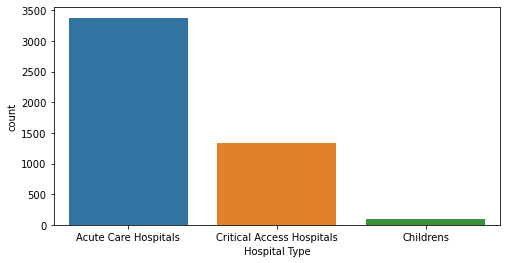

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(genInfo['Hospital Type'])
plt.show()

- From above graph, it can be seen that `most` of the Hospitals fall under the type `Acute Care` and there are `very less` Hospitals which has facility for `Childrens`.

###### Number of Hospitals under each ownership

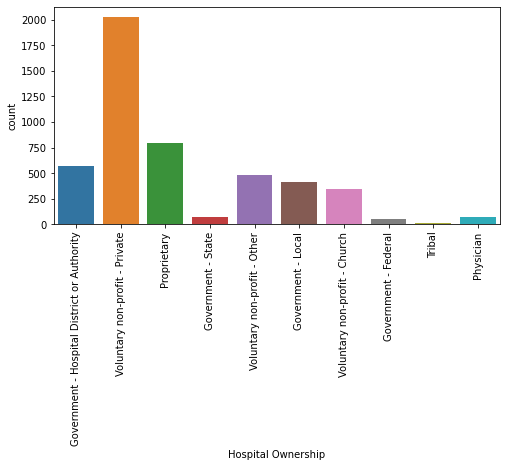

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(genInfo['Hospital Ownership'])
plt.xticks(rotation=90)
plt.show()

- From the graph, Hospitals under the ownership of `Voluntary non-profit - Private` are `very high` when compared to others. `Tribal` owns `very few` hospitals. Also hospitals under Physician, Government-State and Government-Federal ownership are less.

###### Number of Hospitals under each Rating

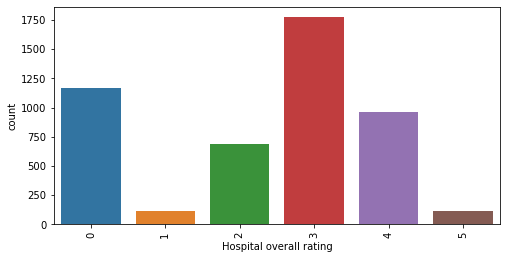

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(genInfo['Hospital overall rating'])
plt.xticks(rotation=90)
plt.show()

- Most of the hospitals fall under `Rating-3` and also rating of many hospitals ratings are `not available`. There are `very few` hospitals which are having `Rating-1`, `Rating-5`.

### 4. Data Preparation

###### Creating dummies for Categorial columns

In [19]:
d1 = pd.get_dummies(genInfo['Hospital Type'], prefix='Type')
d1.drop('Type_Childrens', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Hospital Ownership'], prefix='Ownership')
d1.drop('Ownership_Tribal', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Mortality national comparison'], prefix='Mortality')
d1.drop('Mortality_Below the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Safety of care national comparison'], prefix='Safety')
d1.drop('Safety_Below the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Readmission national comparison'], prefix='Readmission')
d1.drop('Readmission_Above the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Patient experience national comparison'], prefix='Patient')
d1.drop('Patient_Below the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Effectiveness of care national comparison'], prefix='Effectiveness')
d1.drop('Effectiveness_Below the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Timeliness of care national comparison'], prefix='Timeliness')
d1.drop('Timeliness_Below the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

d1 = pd.get_dummies(genInfo['Efficient use of medical imaging national comparison'], prefix='Efficient')
d1.drop('Efficient_Above the National average', axis=1, inplace=True)
genInfo = pd.concat([genInfo,d1], axis=1)

In [20]:
# Viewing the dataset after dummies are created

genInfo.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Type_Acute Care Hospitals,Type_Critical Access Hospitals,Ownership_Government - Federal,Ownership_Government - Hospital District or Authority,Ownership_Government - Local,Ownership_Government - State,Ownership_Physician,Ownership_Proprietary,Ownership_Voluntary non-profit - Church,Ownership_Voluntary non-profit - Other,Ownership_Voluntary non-profit - Private,Mortality_Above the National average,Mortality_Not Available,Mortality_Same as the National average,Safety_Above the National average,Safety_Not Available,Safety_Same as the National average,Readmission_Below the National average,Readmission_Not Available,Readmission_Same as the National average,Patient_Above the National average,Patient_Not Available,Patient_Same as the National average,Effectiveness_Above the National average,Effectiveness_Not Available,Effectiveness_Same as the National average,Timeliness_Above the National average,Timeliness_Not Available,Timeliness_Same as the National average,Efficient_Below the National average,Efficient_Not Available,Efficient_Same as the National average
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,1,1,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,1,1,3,Same as the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Above the National average,Not Available,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,1,1,3,Same as the National average,Not Available,Same as the National average,Not Available,Same as the National average,Above the National average,Not Available,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0


###### Dropping the columns for which dummy columns were created

In [21]:
genInfo.drop(['Hospital Type', 'Hospital Ownership', 'Mortality national comparison', 'Safety of care national comparison',
              'Readmission national comparison', 'Patient experience national comparison',
              'Effectiveness of care national comparison', 'Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison'], axis=1, inplace=True)

In [22]:
# Viewing the dataset

genInfo.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Type_Acute Care Hospitals,Type_Critical Access Hospitals,Ownership_Government - Federal,Ownership_Government - Hospital District or Authority,Ownership_Government - Local,Ownership_Government - State,Ownership_Physician,Ownership_Proprietary,Ownership_Voluntary non-profit - Church,Ownership_Voluntary non-profit - Other,Ownership_Voluntary non-profit - Private,Mortality_Above the National average,Mortality_Not Available,Mortality_Same as the National average,Safety_Above the National average,Safety_Not Available,Safety_Same as the National average,Readmission_Below the National average,Readmission_Not Available,Readmission_Same as the National average,Patient_Above the National average,Patient_Not Available,Patient_Same as the National average,Effectiveness_Above the National average,Effectiveness_Not Available,Effectiveness_Same as the National average,Timeliness_Above the National average,Timeliness_Not Available,Timeliness_Same as the National average,Efficient_Below the National average,Efficient_Not Available,Efficient_Same as the National average
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,1,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,1,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0


In [23]:
# Number of rows and columns in dataset

genInfo.shape

(4818, 43)

###### Plotting the correlation matrix for the dataset

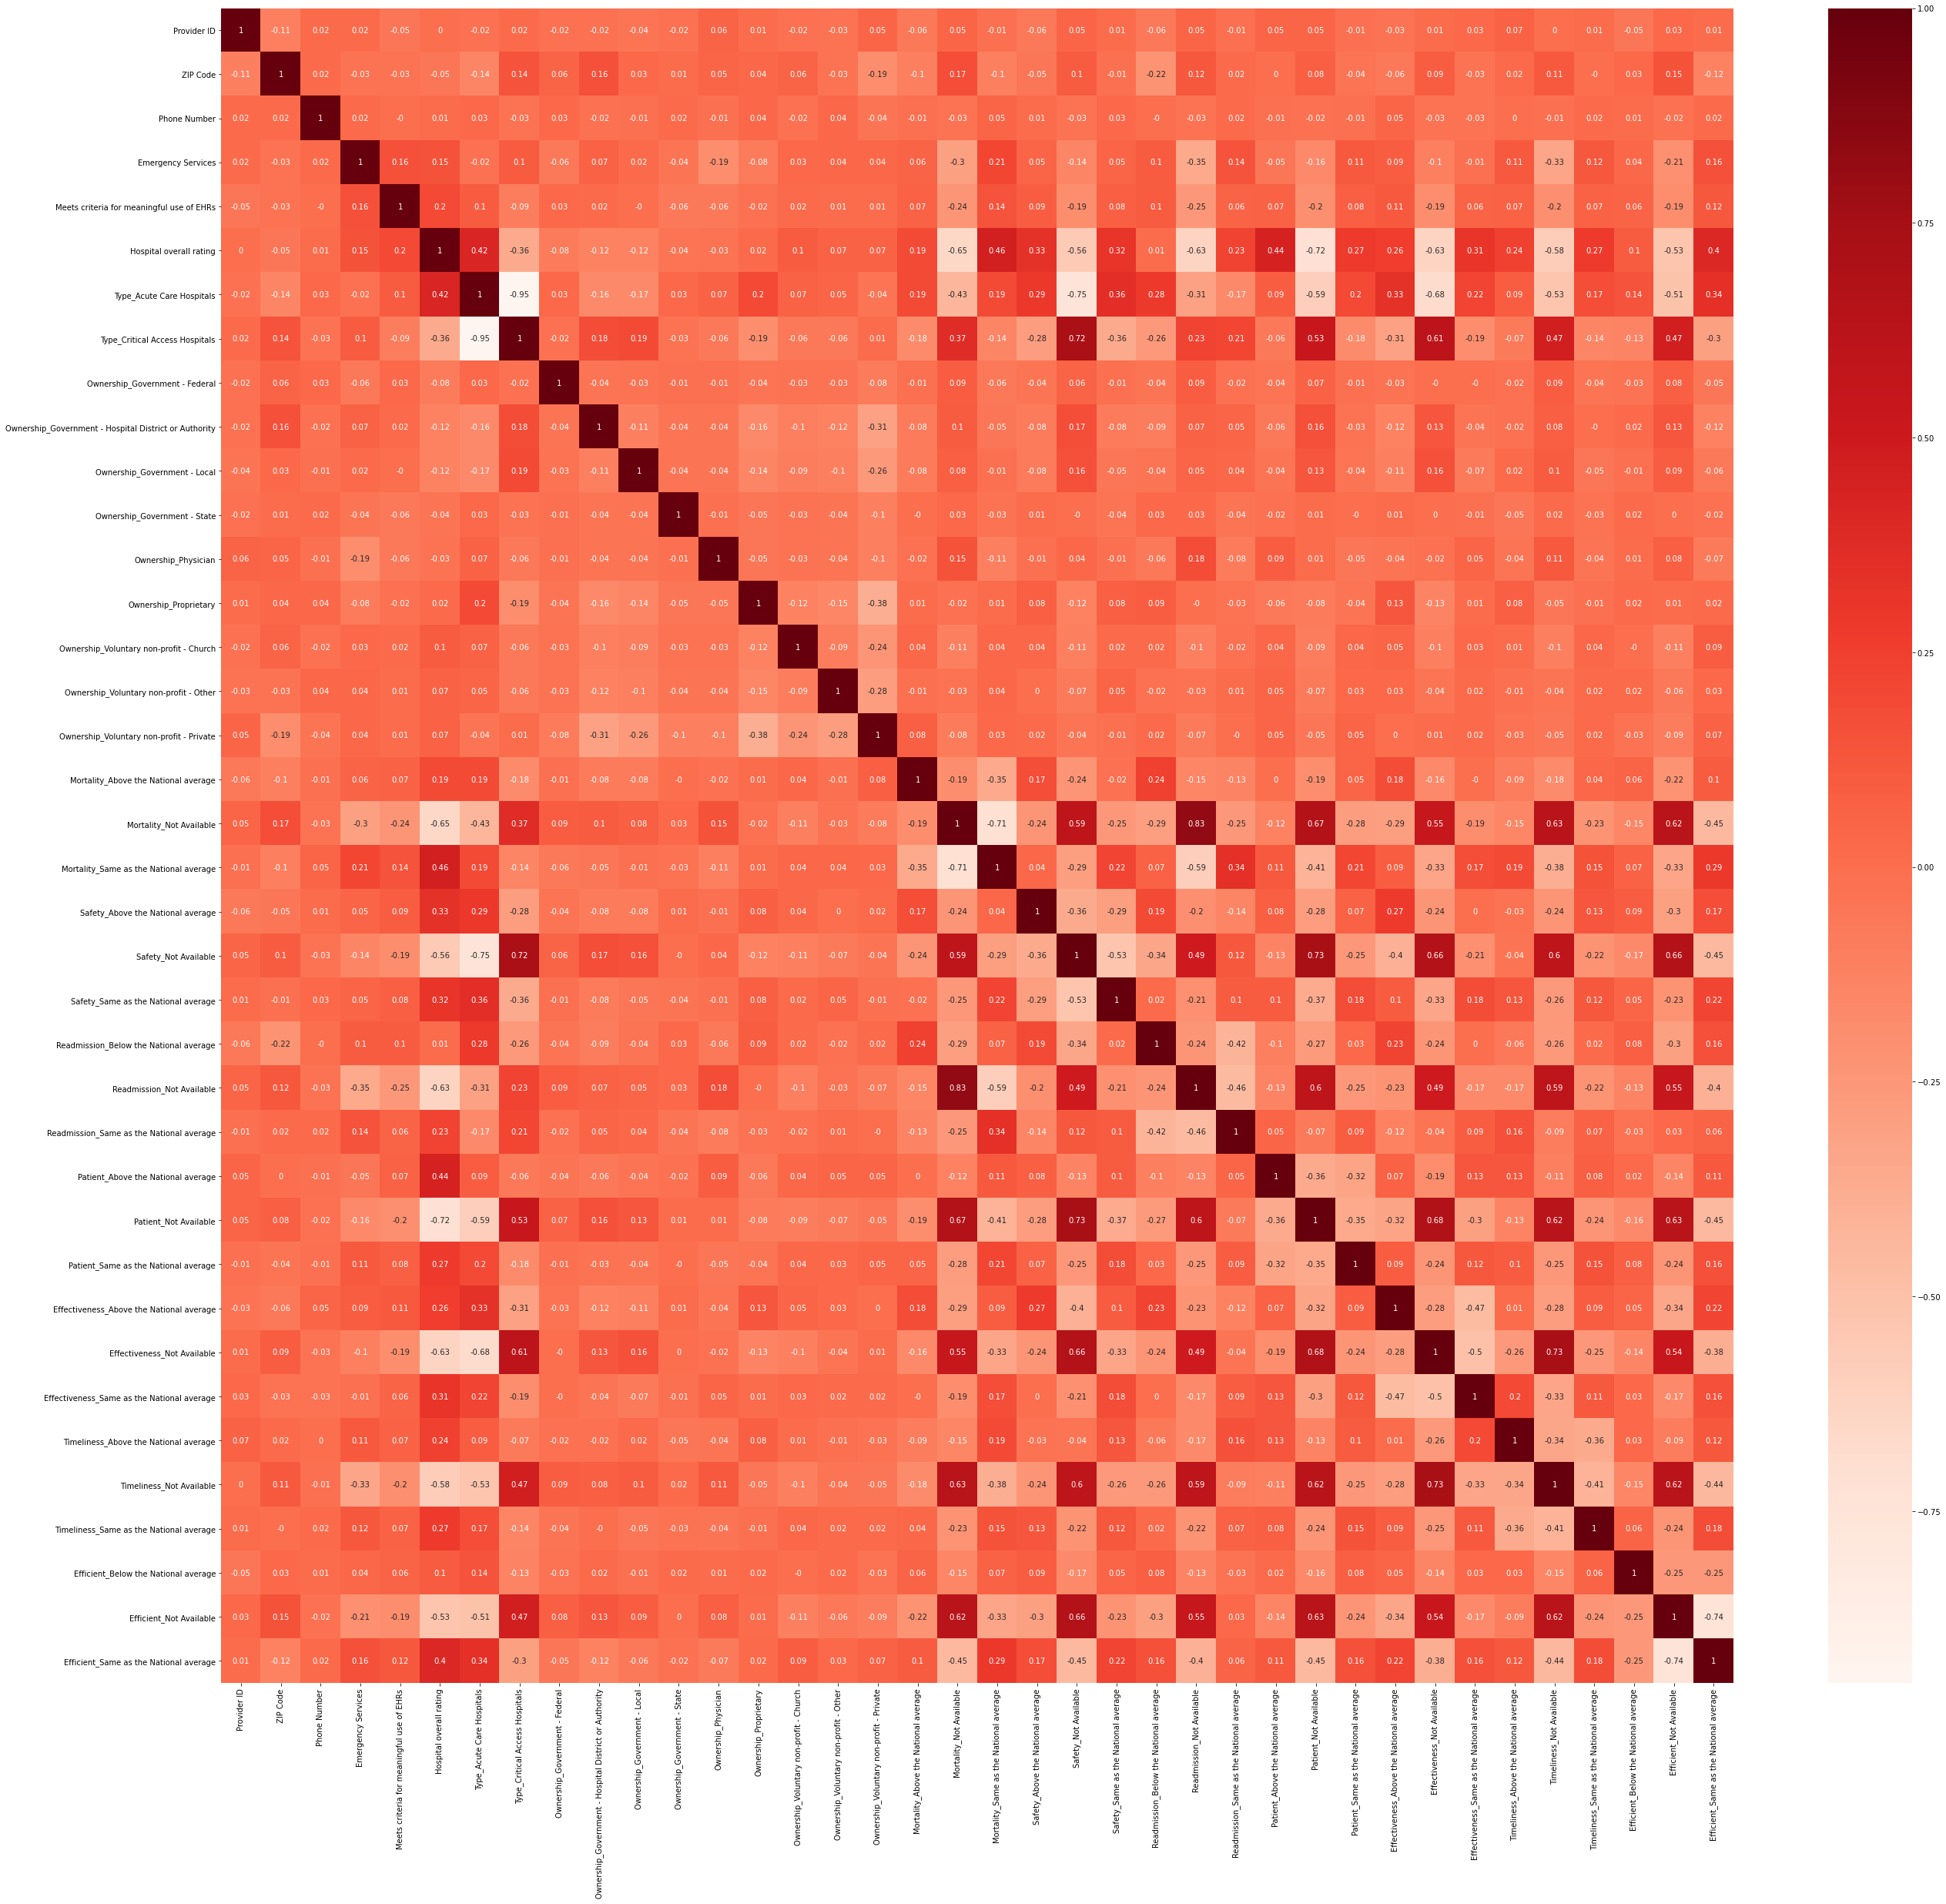

In [24]:
plt.figure(figsize=(44,40))
sns.heatmap(round(genInfo.corr(),2), annot=True, cmap='Reds')
plt.show()

- There are few variables which are positively correlated to each other and some are negatively correlated as well.

###### Dropping other categorical columns like City, Country, Phone Number etc which don't add much value to dataset as we need to find the factors influencing the rating of Hospital

In [25]:
df = genInfo.drop(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number'],axis=1)

In [26]:
df.head()

,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Type_Acute Care Hospitals,Type_Critical Access Hospitals,Ownership_Government - Federal,Ownership_Government - Hospital District or Authority,Ownership_Government - Local,Ownership_Government - State,Ownership_Physician,Ownership_Proprietary,Ownership_Voluntary non-profit - Church,Ownership_Voluntary non-profit - Other,Ownership_Voluntary non-profit - Private,Mortality_Above the National average,Mortality_Not Available,Mortality_Same as the National average,Safety_Above the National average,Safety_Not Available,Safety_Same as the National average,Readmission_Below the National average,Readmission_Not Available,Readmission_Same as the National average,Patient_Above the National average,Patient_Not Available,Patient_Same as the National average,Effectiveness_Above the National average,Effectiveness_Not Available,Effectiveness_Same as the National average,Timeliness_Above the National average,Timeliness_Not Available,Timeliness_Same as the National average,Efficient_Below the National average,Efficient_Not Available,Efficient_Same as the National average
0,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,1,1,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
2,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
3,1,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
4,1,1,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0


In [27]:
# Information of dataset used for modelling

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 35 columns):
 #   Column                                                 Non-Null Count  Dtype
---  ------                                                 --------------  -----
 0   Emergency Services                                     4818 non-null   int64
 1   Meets criteria for meaningful use of EHRs              4818 non-null   int64
 2   Hospital overall rating                                4818 non-null   int64
 3   Type_Acute Care Hospitals                              4818 non-null   uint8
 4   Type_Critical Access Hospitals                         4818 non-null   uint8
 5   Ownership_Government - Federal                         4818 non-null   uint8
 6   Ownership_Government - Hospital District or Authority  4818 non-null   uint8
 7   Ownership_Government - Local                           4818 non-null   uint8
 8   Ownership_Government - State                           4818 non-null

### 5. Model Building

###    Logistic Regression

###### Splitting the dataframe into train and test

In [28]:
X = df.drop('Hospital overall rating', 1)
y = df['Hospital overall rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [29]:
X_train.shape, X_test.shape

((3372, 34), (1446, 34))

###### Create a LogisticRegression object and performing RFE to top 20 features
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [30]:
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [31]:
# Selecting 20 variables

rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [32]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Emergency Services', True, 1),
 ('Meets criteria for meaningful use of EHRs', False, 4),
 ('Type_Acute Care Hospitals', True, 1),
 ('Type_Critical Access Hospitals', False, 3),
 ('Ownership_Government - Federal', False, 10),
 ('Ownership_Government - Hospital District or Authority', False, 15),
 ('Ownership_Government - Local', False, 2),
 ('Ownership_Government - State', False, 8),
 ('Ownership_Physician', False, 7),
 ('Ownership_Proprietary', False, 14),
 ('Ownership_Voluntary non-profit - Church', False, 11),
 ('Ownership_Voluntary non-profit - Other', False, 12),
 ('Ownership_Voluntary non-profit - Private', False, 13),
 ('Mortality_Above the National average', True, 1),
 ('Mortality_Not Available', True, 1),
 ('Mortality_Same as the National average', True, 1),
 ('Safety_Above the National average', True, 1),
 ('Safety_Not Available', True, 1),
 ('Safety_Same as the National average', True, 1),
 ('Readmission_Below the National average', True, 1),
 ('Readmission_Not Available',

In [33]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Emergency Services', 'Type_Acute Care Hospitals',
       'Mortality_Above the National average', 'Mortality_Not Available',
       'Mortality_Same as the National average',
       'Safety_Above the National average', 'Safety_Not Available',
       'Safety_Same as the National average',
       'Readmission_Below the National average', 'Readmission_Not Available',
       'Readmission_Same as the National average',
       'Patient_Above the National average', 'Patient_Not Available',
       'Patient_Same as the National average', 'Effectiveness_Not Available',
       'Timeliness_Above the National average', 'Timeliness_Not Available',
       'Timeliness_Same as the National average',
       'Efficient_Below the National average', 'Efficient_Not Available'],
      dtype='object')

###### Fit a logistic Regression model on X_train after adding a constant and output the summary and Calculating VIF value

###### Logit Model 1

In [34]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm)
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Hospital overall rating   No. Observations:                 3372
Model:                                 GLM   Df Residuals:                     3351
Model Family:                     Gaussian   Df Model:                           20
Link Function:                    identity   Scale:                         0.50982
Method:                               IRLS   Log-Likelihood:                -3638.3
Date:                     Sun, 03 Jan 2021   Deviance:                       1708.4
Time:                             14:35:55   Pearson chi2:                 1.71e+03
No. Iterations:                          3                                         
Covariance Type:                 nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.4745      0.106     23.374      0.000       2.267       2.682
Emergency Services                          -0.2955      0.060     -4.897      0.000      -0.414      -0.177
Type_Acute Care Hospitals                   -0.3179      0.046     -6.847      0.000      -0.409      -0.227
Mortality_Above the National average         1.0196      0.063     16.144      0.000       0.896       1.143
Mortality_Not Available                      0.0037      0.074      0.050      0.960      -0.142       0.149
Mortality_Same as the National average       0.5979      0.050     12.041      0.000       0.501       0.695
Safety_Above the National average            0.8647      0.046     18.973      0.000       0.775       0.954
Safety_Not Available                         0.1564      0.063      2.463      0.014       0.032       0.281
Safety_Same as the National average          0.5378      0.043     12.530      0.000       0.454       0.622
Readmission_Below the National average      -0.8897      0.043    -20.468      0.000      -0.975      -0.804
Readmission_Not Available                   -1.0587      0.069    -15.286      0.000      -1.194      -0.923
Readmission_Same as the National average    -0.2907      0.040     -7.294      0.000      -0.369      -0.213
Patient_Above the National average           0.9476      0.041     23.273      0.000       0.868       1.027
Patient_Not Available                       -0.5300      0.058     -9.155      0.000      -0.643      -0.417
Patient_Same as the National average         0.4383      0.039     11.334      0.000       0.363       0.514
Effectiveness_Not Available                 -0.7730      0.052    -14.995      0.000      -0.874      -0.672
Timeliness_Above the National average        0.2492      0.045      5.599      0.000       0.162       0.336
Timeliness_Not Available                     0.0592      0.059      1.000      0.317      -0.057       0.175
Timeliness_Same as the National average      0.1822      0.040      4.601      0.000       0.105       0.260
Efficient_Below the National average        -0.1955      0.048     -4.037      0.000      -0.290      -0.101
Efficient_Not Available                     -0.1169      0.038     -3.068      0.002      -0.192      -0.042
============================================================================================================
"""

In [35]:
# Calculating the VIF values

VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,Emergency Services,12.63
6,Safety_Not Available,9.75
3,Mortality_Not Available,9.42
4,Mortality_Same as the National average,7.94
1,Type_Acute Care Hospitals,6.77
9,Readmission_Not Available,6.63
12,Patient_Not Available,6.27
16,Timeliness_Not Available,6.23
10,Readmission_Same as the National average,4.39
19,Efficient_Not Available,4.11


In [36]:
col = col.drop('Mortality_Not Available')
col

Index(['Emergency Services', 'Type_Acute Care Hospitals',
       'Mortality_Above the National average',
       'Mortality_Same as the National average',
       'Safety_Above the National average', 'Safety_Not Available',
       'Safety_Same as the National average',
       'Readmission_Below the National average', 'Readmission_Not Available',
       'Readmission_Same as the National average',
       'Patient_Above the National average', 'Patient_Not Available',
       'Patient_Same as the National average', 'Effectiveness_Not Available',
       'Timeliness_Above the National average', 'Timeliness_Not Available',
       'Timeliness_Same as the National average',
       'Efficient_Below the National average', 'Efficient_Not Available'],
      dtype='object')

###### Logit Model 2

In [37]:
# Fit a logistic Regression model on X_train

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm)
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Hospital overall rating   No. Observations:                 3372
Model:                                 GLM   Df Residuals:                     3352
Model Family:                     Gaussian   Df Model:                           19
Link Function:                    identity   Scale:                         0.50967
Method:                               IRLS   Log-Likelihood:                -3638.3
Date:                     Sun, 03 Jan 2021   Deviance:                       1708.4
Time:                             14:35:56   Pearson chi2:                 1.71e+03
No. Iterations:                          3                                         
Covariance Type:                 nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.4759      0.102     24.329      0.000       2.276       2.675
Emergency Services                          -0.2956      0.060     -4.903      0.000      -0.414      -0.177
Type_Acute Care Hospitals                   -0.3180      0.046     -6.859      0.000      -0.409      -0.227
Mortality_Above the National average         1.0182      0.057     17.894      0.000       0.907       1.130
Mortality_Same as the National average       0.5962      0.037     16.006      0.000       0.523       0.669
Safety_Above the National average            0.8647      0.046     18.980      0.000       0.775       0.954
Safety_Not Available                         0.1566      0.063      2.473      0.013       0.033       0.281
Safety_Same as the National average          0.5378      0.043     12.536      0.000       0.454       0.622
Readmission_Below the National average      -0.8896      0.043    -20.475      0.000      -0.975      -0.804
Readmission_Not Available                   -1.0571      0.061    -17.214      0.000      -1.178      -0.937
Readmission_Same as the National average    -0.2905      0.040     -7.322      0.000      -0.368      -0.213
Patient_Above the National average           0.9478      0.041     23.366      0.000       0.868       1.027
Patient_Not Available                       -0.5297      0.058     -9.204      0.000      -0.642      -0.417
Patient_Same as the National average         0.4384      0.039     11.342      0.000       0.363       0.514
Effectiveness_Not Available                 -0.7731      0.052    -14.998      0.000      -0.874      -0.672
Timeliness_Above the National average        0.2492      0.044      5.601      0.000       0.162       0.336
Timeliness_Not Available                     0.0594      0.059      1.002      0.316      -0.057       0.175
Timeliness_Same as the National average      0.1822      0.040      4.601      0.000       0.105       0.260
Efficient_Below the National average        -0.1955      0.048     -4.037      0.000      -0.290      -0.101
Efficient_Not Available                     -0.1167      0.038     -3.088      0.002      -0.191      -0.043
============================================================================================================
"""

In [38]:
# Calculating the VIF values

VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,Emergency Services,12.10
5,Safety_Not Available,9.50
1,Type_Acute Care Hospitals,6.65
15,Timeliness_Not Available,6.16
11,Patient_Not Available,6.16
8,Readmission_Not Available,4.84
3,Mortality_Same as the National average,4.83
9,Readmission_Same as the National average,4.28
13,Effectiveness_Not Available,4.10
18,Efficient_Not Available,4.04


In [39]:
col = col.drop('Timeliness_Not Available')
col

Index(['Emergency Services', 'Type_Acute Care Hospitals',
       'Mortality_Above the National average',
       'Mortality_Same as the National average',
       'Safety_Above the National average', 'Safety_Not Available',
       'Safety_Same as the National average',
       'Readmission_Below the National average', 'Readmission_Not Available',
       'Readmission_Same as the National average',
       'Patient_Above the National average', 'Patient_Not Available',
       'Patient_Same as the National average', 'Effectiveness_Not Available',
       'Timeliness_Above the National average',
       'Timeliness_Same as the National average',
       'Efficient_Below the National average', 'Efficient_Not Available'],
      dtype='object')

###### Logit Model 3

In [40]:
# Fit a logistic Regression model on X_train

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm)
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Hospital overall rating   No. Observations:                 3372
Model:                                 GLM   Df Residuals:                     3353
Model Family:                     Gaussian   Df Model:                           18
Link Function:                    identity   Scale:                         0.50967
Method:                               IRLS   Log-Likelihood:                -3638.8
Date:                     Sun, 03 Jan 2021   Deviance:                       1708.9
Time:                             14:35:57   Pearson chi2:                 1.71e+03
No. Iterations:                          3                                         
Covariance Type:                 nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.5005      0.099     25.315      0.000       2.307       2.694
Emergency Services                          -0.3091      0.059     -5.262      0.000      -0.424      -0.194
Type_Acute Care Hospitals                   -0.3197      0.046     -6.900      0.000      -0.411      -0.229
Mortality_Above the National average         1.0136      0.057     17.872      0.000       0.902       1.125
Mortality_Same as the National average       0.5954      0.037     15.986      0.000       0.522       0.668
Safety_Above the National average            0.8680      0.045     19.105      0.000       0.779       0.957
Safety_Not Available                         0.1632      0.063      2.592      0.010       0.040       0.287
Safety_Same as the National average          0.5430      0.043     12.753      0.000       0.460       0.627
Readmission_Below the National average      -0.8914      0.043    -20.533      0.000      -0.976      -0.806
Readmission_Not Available                   -1.0507      0.061    -17.204      0.000      -1.170      -0.931
Readmission_Same as the National average    -0.2885      0.040     -7.280      0.000      -0.366      -0.211
Patient_Above the National average           0.9558      0.040     24.031      0.000       0.878       1.034
Patient_Not Available                       -0.5219      0.057     -9.152      0.000      -0.634      -0.410
Patient_Same as the National average         0.4440      0.038     11.607      0.000       0.369       0.519
Effectiveness_Not Available                 -0.7556      0.049    -15.578      0.000      -0.851      -0.661
Timeliness_Above the National average        0.2246      0.037      6.051      0.000       0.152       0.297
Timeliness_Same as the National average      0.1594      0.032      4.917      0.000       0.096       0.223
Efficient_Below the National average        -0.1943      0.048     -4.013      0.000      -0.289      -0.099
Efficient_Not Available                     -0.1094      0.037     -2.951      0.003      -0.182      -0.037
============================================================================================================
"""

In [41]:
# Calculating the VIF values

VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
0,Emergency Services,12.02
5,Safety_Not Available,9.14
1,Type_Acute Care Hospitals,6.54
11,Patient_Not Available,5.99
3,Mortality_Same as the National average,4.82
8,Readmission_Not Available,4.67
9,Readmission_Same as the National average,4.22
17,Efficient_Not Available,3.88
13,Effectiveness_Not Available,3.54
6,Safety_Same as the National average,3.39


In [42]:
col = col.drop('Emergency Services')
col

Index(['Type_Acute Care Hospitals', 'Mortality_Above the National average',
       'Mortality_Same as the National average',
       'Safety_Above the National average', 'Safety_Not Available',
       'Safety_Same as the National average',
       'Readmission_Below the National average', 'Readmission_Not Available',
       'Readmission_Same as the National average',
       'Patient_Above the National average', 'Patient_Not Available',
       'Patient_Same as the National average', 'Effectiveness_Not Available',
       'Timeliness_Above the National average',
       'Timeliness_Same as the National average',
       'Efficient_Below the National average', 'Efficient_Not Available'],
      dtype='object')

###### Logit Model 4

In [43]:
# Fit a logistic Regression model on X_train

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm)
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Hospital overall rating   No. Observations:                 3372
Model:                                 GLM   Df Residuals:                     3354
Model Family:                     Gaussian   Df Model:                           17
Link Function:                    identity   Scale:                         0.51372
Method:                               IRLS   Log-Likelihood:                -3652.6
Date:                     Sun, 03 Jan 2021   Deviance:                       1723.0
Time:                             14:35:57   Pearson chi2:                 1.72e+03
No. Iterations:                          3                                         
Covariance Type:                 nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        2.1549      0.074     29.090      0.000       2.010       2.300
Type_Acute Care Hospitals                   -0.2764      0.046     -6.037      0.000      -0.366      -0.187
Mortality_Above the National average         1.0052      0.057     17.661      0.000       0.894       1.117
Mortality_Same as the National average       0.5906      0.037     15.801      0.000       0.517       0.664
Safety_Above the National average            0.8777      0.046     19.256      0.000       0.788       0.967
Safety_Not Available                         0.1880      0.063      2.983      0.003       0.064       0.312
Safety_Same as the National average          0.5494      0.043     12.857      0.000       0.466       0.633
Readmission_Below the National average      -0.8919      0.044    -20.462      0.000      -0.977      -0.806
Readmission_Not Available                   -0.9929      0.060    -16.462      0.000      -1.111      -0.875
Readmission_Same as the National average    -0.2779      0.040     -6.995      0.000      -0.356      -0.200
Patient_Above the National average           0.9797      0.040     24.698      0.000       0.902       1.057
Patient_Not Available                       -0.5160      0.057     -9.014      0.000      -0.628      -0.404
Patient_Same as the National average         0.4525      0.038     11.795      0.000       0.377       0.528
Effectiveness_Not Available                 -0.7692      0.049    -15.819      0.000      -0.865      -0.674
Timeliness_Above the National average        0.1952      0.037      5.299      0.000       0.123       0.267
Timeliness_Same as the National average      0.1376      0.032      4.263      0.000       0.074       0.201
Efficient_Below the National average        -0.1900      0.049     -3.911      0.000      -0.285      -0.095
Efficient_Not Available                     -0.1012      0.037     -2.719      0.007      -0.174      -0.028
============================================================================================================
"""

In [44]:
# Calculating the VIF values

VIF = pd.DataFrame()
VIF['Features'] = X_train[col].columns
VIF['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = 'VIF', ascending = False)
VIF

,Features,VIF
7,Readmission_Not Available,1.32
10,Patient_Not Available,1.18
15,Efficient_Below the National average,1.15
5,Safety_Same as the National average,0.79
13,Timeliness_Above the National average,0.64
8,Readmission_Same as the National average,0.55
16,Efficient_Not Available,0.44
4,Safety_Not Available,0.36
6,Readmission_Below the National average,0.34
2,Mortality_Same as the National average,0.26


- Since all the p-values and VIF values are low for all the columns, let's consider the `Model 4` as the final model

#### Model Evaluation

In [45]:
# Predicting the target values based on the predictor values using the final model

y_train_pred = res.predict(X_train_sm)

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 3.53418956,  3.8990392 ,  3.79935357,  2.58204241,  2.90258332,
        4.13589471,  2.44443838,  3.33080425,  0.10137087, -0.03623316])

#### Actual vs Predicted

In [46]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Rating':y_train.values, 'Rating_Prob':y_train_pred})
y_train_pred_final.head()

,Rating,Rating_Prob
0,3,3.534190
1,4,3.899039
2,4,3.799354
3,2,2.582042
4,4,2.902583


In [47]:
# Creating new column 'Predicted' by rounding-off the value to next highest number

y_train_pred_final['Predicted'] = y_train_pred_final.Rating_Prob.map(lambda x: round(x) if x > 0 else 0)

# Let's see the head

y_train_pred_final.head()

,Rating,Rating_Prob,Predicted
0,3,3.534190,4
1,4,3.899039,4
2,4,3.799354,4
3,2,2.582042,3
4,4,2.902583,3


In [48]:
# Create confusion matrix 

confusion = confusion_matrix(y_train_pred_final.Rating, y_train_pred_final.Predicted)
print(confusion)

[[499 278  48   0   0   0]
 [  0  21  63   1   0   0]
 [  0  27 318 131   0   0]
 [  0  43 249 757 186   0]
 [  0   5  52 196 405  19]
 [  0   0  13  16  30  15]]


In [49]:
# Let's check the overall accuracy

accuracyscore = round(accuracy_score(y_train_pred_final.Rating, y_train_pred_final.Predicted), 2)
print(accuracyscore)

0.6


In [50]:
# Printing classification report

print(classification_report(y_train_pred_final.Rating, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       825
           1       0.06      0.25      0.09        85
           2       0.43      0.67      0.52       476
           3       0.69      0.61      0.65      1235
           4       0.65      0.60      0.62       677
           5       0.44      0.20      0.28        74

    accuracy                           0.60      3372
   macro avg       0.54      0.49      0.49      3372
weighted avg       0.70      0.60      0.63      3372



In [51]:
# Adding results into the dataframe

results = pd.DataFrame({'Method':['Logistic Regression Train'], 'Accuracy': [accuracyscore]})

results = results[['Method','Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.6


###### Making prediction on Test dataset

In [52]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[col]

In [53]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test_new)

In [54]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [55]:
y_test_pred.head()

2675    1.577286
3210    2.869559
3590    2.935904
917     3.330804
729     2.907477
dtype: float64

In [56]:
# Converting y_pred to a dataframe

y_pred = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [57]:
# Append y_test_df and y_pred

y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Rating_Prob'})
y_pred_final.head()

,Hospital overall rating,Rating_Prob
0,2,1.577286
1,4,2.869559
2,2,2.935904
3,3,3.330804
4,3,2.907477


In [58]:
# Creating new column 'Predicted' by rounding-off the value to next highest number

y_pred_final['Predicted'] = y_pred_final.Rating_Prob.map(lambda x: round(x) if x > 0 else 0)

# Let's see the head
y_pred_final.head()

,Hospital overall rating,Rating_Prob,Predicted
0,2,1.577286,2
1,4,2.869559,3
2,2,2.935904,3
3,3,3.330804,3
4,3,2.907477,3


In [59]:
# Create confusion matrix 

confusion = confusion_matrix(y_pred_final['Hospital overall rating'], y_pred_final.Predicted)
print(confusion)

[[193 129  23   0   0   0]
 [  0   6  26   0   0   0]
 [  0   7 130  70   1   0]
 [  0  21 103 323  90   0]
 [  0   0  18  70 189  10]
 [  0   0   8   7  15   7]]


In [60]:
# Let's check the overall accuracy

accuracyscore = round(accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final.Predicted), 2)
print(accuracyscore)

0.59


In [61]:
# Printing classification report

print(classification_report(y_pred_final['Hospital overall rating'], y_pred_final.Predicted))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       345
           1       0.04      0.19      0.06        32
           2       0.42      0.62      0.50       208
           3       0.69      0.60      0.64       537
           4       0.64      0.66      0.65       287
           5       0.41      0.19      0.26        37

    accuracy                           0.59      1446
   macro avg       0.53      0.47      0.47      1446
weighted avg       0.69      0.59      0.62      1446



In [62]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Logistic Regression Test'], 'Accuracy': [accuracyscore]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59


### Decision Tree

In [63]:
# splitting  data into 70% train set and  30% test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
# Number of rows and columns in Train and Test dataset

X_train.shape, X_test.shape

((3372, 34), (1446, 34))

In [65]:
# Creating object of Decision tree classifier and fitting it

dt = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [66]:
# Creating a function called 'evaluate_model' to find accuracy and other evaluation metrics

def evaluate_model(classifier):
    accuracy_train = round(accuracy_score(y_train, classifier.predict(X_train)), 2)
    print("Train Accuracy :", accuracy_train)
    print("Train Confusion Matrix:")
    print(plot_confusion_matrix(classifier, X_train, y_train, cmap=plt.cm.Blues))
    plt.show()
    print("Train Clasification report:")
    print(classification_report(y_train, classifier.predict(X_train)))
    print("-"*50)
    accuracy_test = round(accuracy_score(y_test, classifier.predict(X_test)), 2)
    print("Test Accuracy :", accuracy_test)
    print("Test Confusion Matrix:")
    print(plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues))
    plt.show()
    print("Test Clasification report:")
    print(classification_report(y_test, classifier.predict(X_test)))
    return accuracy_train, accuracy_test

###### Evaluating the model and printing the results

Train Accuracy : 0.59
Train Confusion Matrix:


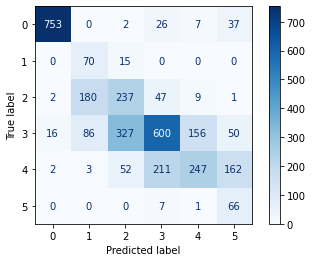

Train Clasification report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       825
           1       0.21      0.82      0.33        85
           2       0.37      0.50      0.43       476
           3       0.67      0.49      0.56      1235
           4       0.59      0.36      0.45       677
           5       0.21      0.89      0.34        74

    accuracy                           0.59      3372
   macro avg       0.50      0.66      0.51      3372
weighted avg       0.67      0.59      0.60      3372

--------------------------------------------------
Test Accuracy : 0.57
Test Confusion Matrix:


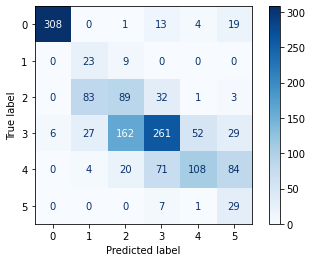

Test Clasification report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       345
           1       0.17      0.72      0.27        32
           2       0.32      0.43      0.36       208
           3       0.68      0.49      0.57       537
           4       0.65      0.38      0.48       287
           5       0.18      0.78      0.29        37

    accuracy                           0.57      1446
   macro avg       0.50      0.61      0.48      1446
weighted avg       0.67      0.57      0.59      1446



In [67]:
accuracy_train, accuracy_test = evaluate_model(dt)

In [68]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Decision Tree Train'], 'Accuracy': [accuracy_train]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59


In [69]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Decision Tree Test'], 'Accuracy': [accuracy_test]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57


###### Hyper-parameter tuning for the Decision Tree

In [70]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [71]:
params = {
    "max_depth": [2,3,5,10],
    "min_samples_leaf": [5,10,20,50,75,100],
    "criterion": ["gini", "entropy"]
}

In [72]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [73]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    5.1s finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [74]:
# Printing the best score of the estimator

round(grid_search.best_score_, 2)

0.68

In [75]:
# Printing the best estimator

dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, random_state=42)

###### Evaluating the model and printing the results

Train Accuracy : 0.74
Train Confusion Matrix:


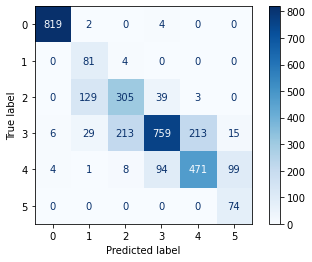

Train Clasification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       825
           1       0.33      0.95      0.50        85
           2       0.58      0.64      0.61       476
           3       0.85      0.61      0.71      1235
           4       0.69      0.70      0.69       677
           5       0.39      1.00      0.56        74

    accuracy                           0.74      3372
   macro avg       0.64      0.82      0.68      3372
weighted avg       0.79      0.74      0.75      3372

--------------------------------------------------
Test Accuracy : 0.69
Test Confusion Matrix:


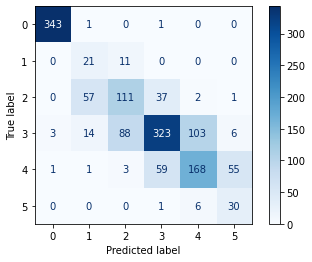

Test Clasification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       345
           1       0.22      0.66      0.33        32
           2       0.52      0.53      0.53       208
           3       0.77      0.60      0.67       537
           4       0.60      0.59      0.59       287
           5       0.33      0.81      0.47        37

    accuracy                           0.69      1446
   macro avg       0.57      0.70      0.60      1446
weighted avg       0.73      0.69      0.70      1446



In [76]:
accuracy_train, accuracy_test = evaluate_model(dt_best)

In [77]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Decision Tree Hyperparameter Tuning Train'], 'Accuracy': [accuracy_train]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74


In [78]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Decision Tree Hyperparameter Tuning Test'], 'Accuracy': [accuracy_test]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74
0,Decision Tree Hyperparameter Tuning Test,0.69


### Random Forest

In [79]:
# Creating the object of Random forest classifier and fitting it

rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, 
                            oob_score=True, class_weight='balanced_subsample')

In [80]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       max_features=5, n_estimators=10, oob_score=True,
                       random_state=100)

In [81]:
# Printing the OOB score

round(rf.oob_score_, 2)

0.52

###### Evaluating the model and printing the results

Train Accuracy : 0.58
Train Confusion Matrix:


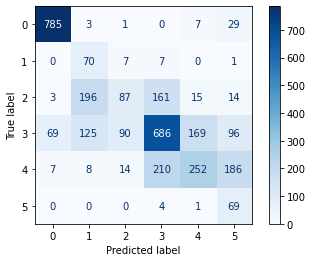

Train Clasification report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       825
           1       0.17      0.82      0.29        85
           2       0.44      0.18      0.26       476
           3       0.64      0.56      0.60      1235
           4       0.57      0.37      0.45       677
           5       0.17      0.93      0.29        74

    accuracy                           0.58      3372
   macro avg       0.48      0.64      0.47      3372
weighted avg       0.64      0.58      0.59      3372

--------------------------------------------------
Test Accuracy : 0.56
Test Confusion Matrix:


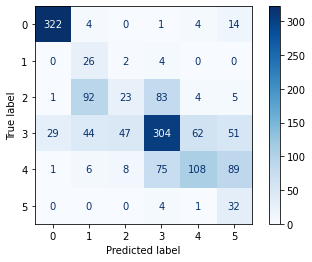

Test Clasification report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       345
           1       0.15      0.81      0.25        32
           2       0.29      0.11      0.16       208
           3       0.65      0.57      0.60       537
           4       0.60      0.38      0.46       287
           5       0.17      0.86      0.28        37

    accuracy                           0.56      1446
   macro avg       0.46      0.61      0.45      1446
weighted avg       0.63      0.56      0.57      1446



In [82]:
accuracy_train, accuracy_test = evaluate_model(rf)

In [83]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Random Forest Train'], 'Accuracy': [accuracy_train]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74
0,Decision Tree Hyperparameter Tuning Test,0.69
0,Random Forest Train,0.58


In [84]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Random Forest Test'], 'Accuracy': [accuracy_test]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74
0,Decision Tree Hyperparameter Tuning Test,0.69
0,Random Forest Train,0.58
0,Random Forest Test,0.56


###### Hyper-parameter tuning for the Random Forest

In [85]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced', oob_score=True)

In [86]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [10,20,50,75,100,200],
    'n_estimators': [10, 25, 50, 100],
    'criterion': ['gini','entropy']
}

In [87]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [88]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  1.5min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [10, 20, 50, 75, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [89]:
# Printing the best score of the estimator

round(grid_search.best_score_, 2)

0.65

In [90]:
# Printing the best estimator

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_jobs=-1, oob_score=True,
                       random_state=42)

###### Evaluating the model and printing the results

Train Accuracy : 0.69
Train Confusion Matrix:


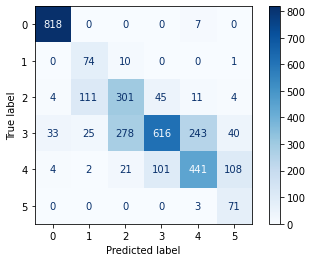

Train Clasification report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       825
           1       0.35      0.87      0.50        85
           2       0.49      0.63      0.55       476
           3       0.81      0.50      0.62      1235
           4       0.63      0.65      0.64       677
           5       0.32      0.96      0.48        74

    accuracy                           0.69      3372
   macro avg       0.59      0.77      0.63      3372
weighted avg       0.74      0.69      0.69      3372

--------------------------------------------------
Test Accuracy : 0.65
Test Confusion Matrix:


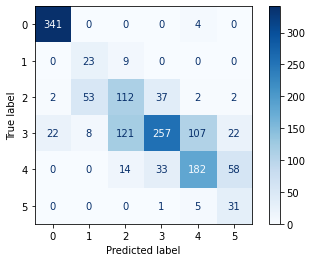

Test Clasification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       345
           1       0.27      0.72      0.40        32
           2       0.44      0.54      0.48       208
           3       0.78      0.48      0.59       537
           4       0.61      0.63      0.62       287
           5       0.27      0.84      0.41        37

    accuracy                           0.65      1446
   macro avg       0.55      0.70      0.58      1446
weighted avg       0.71      0.65      0.66      1446



In [91]:
accuracy_train, accuracy_test = evaluate_model(rf_best)

In [92]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Random Forest Hyperparameter Tuning Train'], 'Accuracy': [accuracy_train]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74
0,Decision Tree Hyperparameter Tuning Test,0.69
0,Random Forest Train,0.58
0,Random Forest Test,0.56
0,Random Forest Hyperparameter Tuning Train,0.69


In [93]:
# Adding results into the dataframe

tempResults = pd.DataFrame({'Method':['Random Forest Hyperparameter Tuning Test'], 'Accuracy': [accuracy_test]})

results = pd.concat([results, tempResults])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
0,Logistic Regression Train,0.60
0,Logistic Regression Test,0.59
0,Decision Tree Train,0.59
0,Decision Tree Test,0.57
0,Decision Tree Hyperparameter Tuning Train,0.74
0,Decision Tree Hyperparameter Tuning Test,0.69
0,Random Forest Train,0.58
0,Random Forest Test,0.56
0,Random Forest Hyperparameter Tuning Train,0.69
0,Random Forest Hyperparameter Tuning Test,0.65


### Importance features using Random forest

In [94]:
rf_best.feature_importances_

array([9.29121497e-03, 1.22569499e-03, 1.79994328e-02, 1.35071807e-02,
       2.91063855e-06, 1.93671800e-03, 2.22151487e-03, 3.46975713e-04,
       2.72034790e-03, 6.30028024e-03, 3.89890493e-03, 2.37809598e-03,
       8.55806327e-03, 1.60564669e-02, 5.20125571e-02, 2.90997457e-02,
       5.07223230e-02, 6.56890309e-02, 2.75818046e-02, 1.01906450e-01,
       5.73300446e-02, 5.80707838e-02, 1.45933619e-01, 9.31925370e-02,
       4.68384385e-02, 1.11617743e-02, 7.04001151e-02, 1.65628645e-02,
       1.90611320e-02, 1.87271372e-02, 1.40147006e-02, 2.95941796e-03,
       1.95926906e-02, 1.26990318e-02])

In [95]:
imp_df = pd.DataFrame({
    "VarName": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [96]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

,VarName,Imp
22,Patient_Above the National average,0.145934
19,Readmission_Below the National average,0.101906
23,Patient_Not Available,0.093193
26,Effectiveness_Not Available,0.070400
17,Safety_Not Available,0.065689
21,Readmission_Same as the National average,0.058071
20,Readmission_Not Available,0.057330
14,Mortality_Not Available,0.052013
16,Safety_Above the National average,0.050722
24,Patient_Same as the National average,0.046838


### Result and Explanation

- The problem statement is to build a model which predicts the hospital rating and also to find the factors that impact the rating of hospital.
- Based on the table below, `Decision Tree with hyperparameter tuning` is the `Best Model` for rating prediction of past hospital data.
- Decision tree with hyperparameter tuning is chosen because the accuracy is pretty good and also the `Recall` value is better compared to other models. 
- Even from the confusion matrix, it can be seen that the probability of Actual rating predicted correctly by the model is good when compared to others which is important for a Hospital. Since the patients opting for a particular hospital depends on the rating.

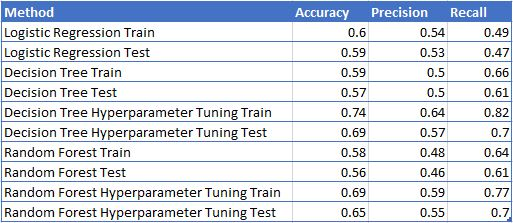

The **`Important features`** that impact the Hospital overall rating are:
1. `Patient experience` - needs to be above the national average i.e., hospital need to make sure they provide great experience for their patients.
2. `Readmission` - needs to be below the national average i.e., hospital need to make sure it gives proper and required treatment to patients to avoid readmission.
3. `Effectiveness of care` - Readmission and effectiveness of care goes hand in hand. If treatment is effective then readmission of patients reduces.
4. `Safety of care` - needs to be above the national average i.e., patients safety must be at most priority, avoid complications
5. `Mortality` - patients dying due to any complications or infections after surgery or during treatment needs to be minimised.